# Car Price Prediction

<b>Notebook has following steps:
    
    Step1:- Data understanding and exploration 
    Stpe2:- Data cleaning 
    Step3:- Data preparation 
    Step4:- Feature Selection using RFE and Model Building   
    Step5:- Linear Regression Assumptions Validation and Outlier Removal 
    Step6:- Rebuilding the Model Post Outlier Removal: Feature Selection using K-Fold Cross Validation & RFE   
    Step7:- Removing Multicollinearity, Model Re-evaluation and Assumptions Validation 
    

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Section 1.
# Part 1: Data Understanding

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Understanding the features and data

1) symboling: -2 (least risky) to +3 most risky most cars are 0,1,2

In [4]:
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

2) aspiration: An (internal combustion) engine property showing whether the oxygen intake is through standard (atmospheric pressure) or through turbocharging (pressurised oxygen intake)

In [5]:
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

3) drivewheel: frontwheel,rear wheel or four-wheel drive

In [6]:
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

4) wheelbase: distance between centre of front and rear wheels

C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


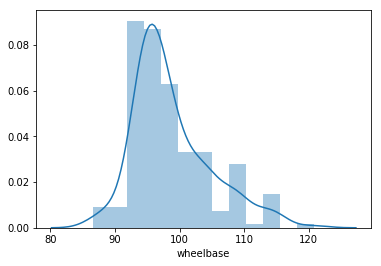

In [9]:
sns.distplot(cars['wheelbase'])
plt.show()

5) curbweight: weight of car without occupants or baggage

C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


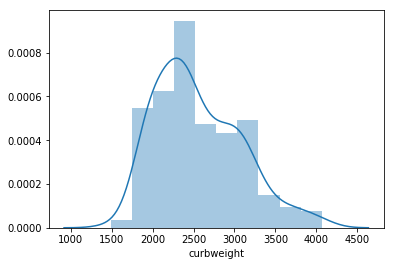

In [11]:
sns.distplot(cars['curbweight'])

6) stroke: volume of the engine (the distance traveled by the piston in each cycle)

C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


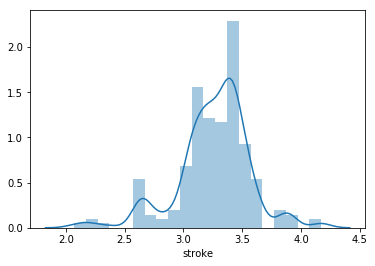

In [12]:
sns.distplot(cars['stroke'])
plt.show()

7) compression ration: ration of volume of compression chamber at largest capacity to least capacity

C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


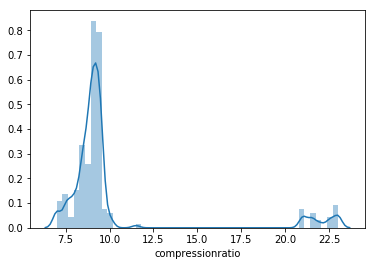

In [13]:
sns.distplot(cars['compressionratio'])
plt.show()

8) target variable: price of car

C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Density or Relative Frequency Of Cars By Price')

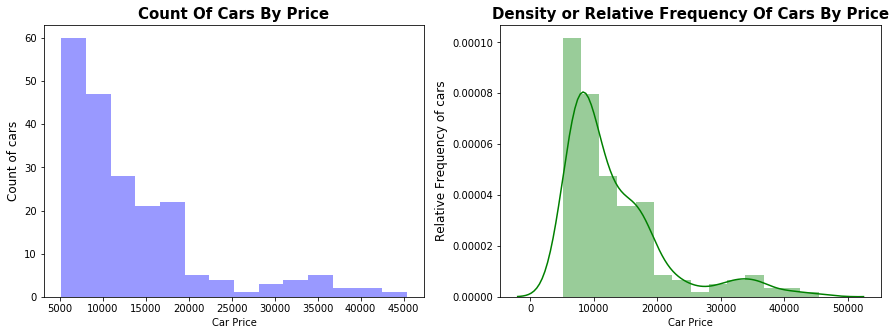

In [14]:
fig, ax= plt.subplots(1,2,figsize=(15,5))
sns.distplot(cars['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")
sns.distplot(cars['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

# Observations on Target Variable- Price:
    
1. The majority of the cars are low priced.
2. More than 50% of the cars are priced 10,000. 
3. close to 35% cars are priced between 10,000 and 20,000. 
4. From 2 and 3 we can conclude that around 85% of cars in US market are priced between 5,000 to 20,000.    
5. Based on above observations and graph on right sideit appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. 


# Section 1.
# Part 2: Data Exploration
For performing linear regression, the target variable must be linearly related to independent variables. Let's see whether that's true in this data set or not

i) creating df  with numeric var's only

In [15]:
cars_numeric=cars.select_dtypes(include=['float64','int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


ii) dropping symboling and car_ID as symboling is more of categorical variable as described before and car_ID is only an index type variable and not a predictor

In [16]:
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


iii) paiwise scatter plot

<Figure size 1440x720 with 0 Axes>

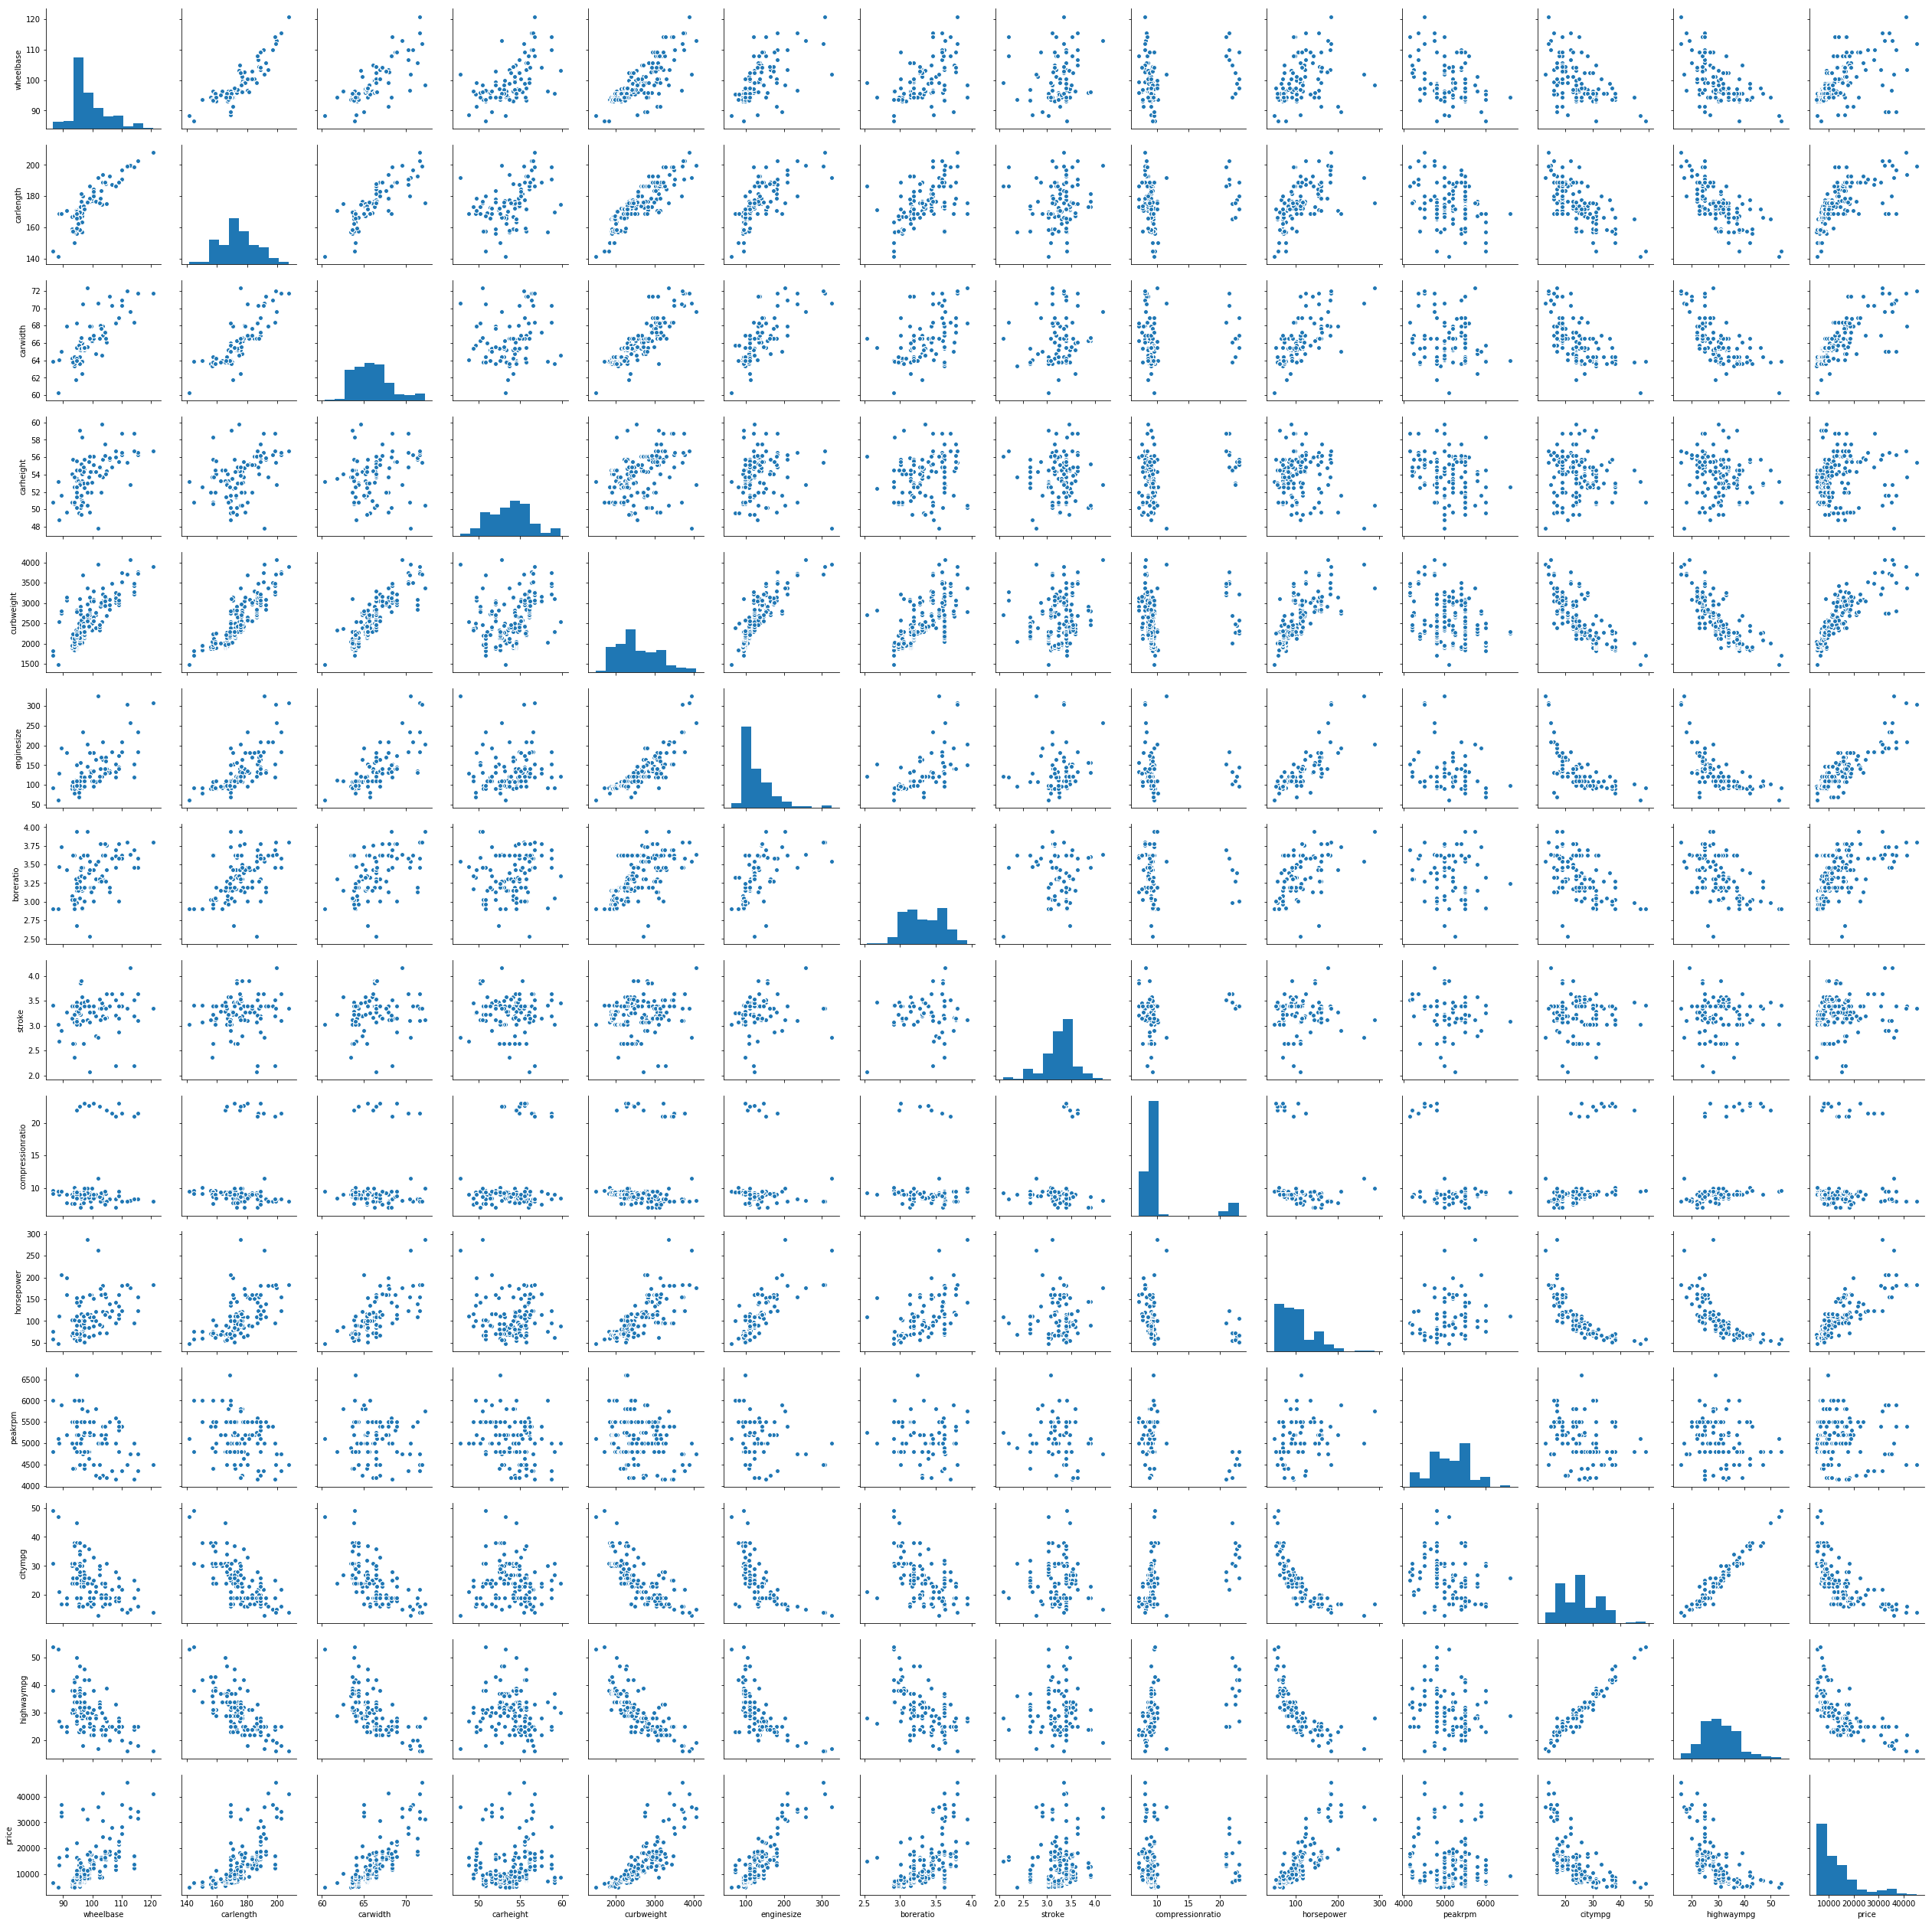

In [18]:
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)

<b> 

- These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg. 
    
- Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.

- In linear regression assumptions validation section we will check for linearity assumption in detail 

#### Correlation matrix 

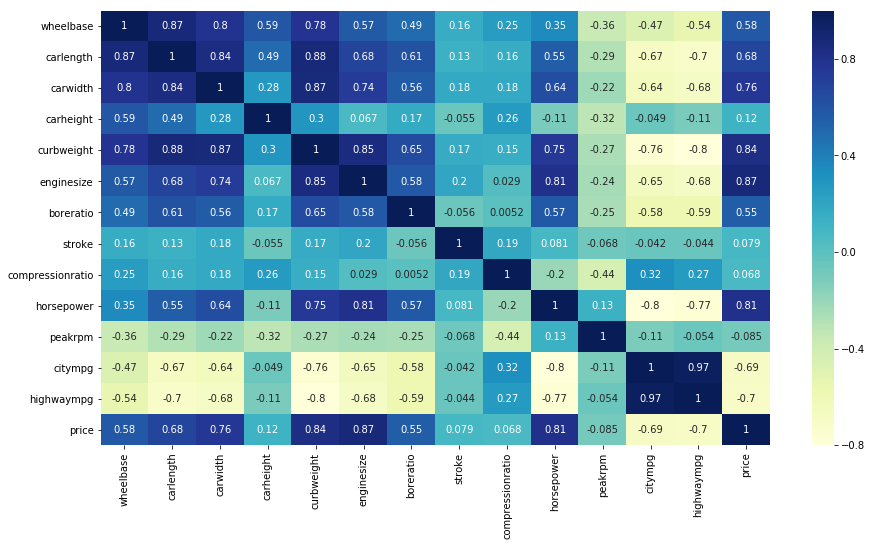

In [25]:
corr=cars_numeric.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

#### Useful insights from Corr Heatmap

 1. Dependent var and indep. var's
     
>Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables     represent the size/weight/engine power of the car)
>Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg 

2. Correlation among independent variables:

>Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of         'size/weight', and are positively correlated 


Since indep. var's are highly correlated we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score

# Section 2: Data Cleaning: Missing values and feature data type check

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

no missing values and all variables are in correct format, however since symboling is a categorical variable we need to change its type 

<b>converting symboling to categorical<b>

In [27]:
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

Extracting car names. Car name is the first word before space

In [28]:
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [29]:
cars['car_company']=carnames
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
maxda           2
vw              2
Nissan          1
mercury         1
vokswagen       1
toyouta         1
porcshce        1
Name: car_company, dtype: int64

Many car names are duplicates like toyota and toyouta, porsche and porcshce etc.We need to fix incorrect spelling and get carnames column in order.

In [30]:
#volkswagen
cars.loc[(cars['car_company']=="vw")|(cars['car_company']=="vokswagen"),"car_company"]="volkswagen"
#porsche
cars.loc[(cars['car_company']=="porcshce"),"car_company"]="porsche"
#toyota
cars.loc[(cars['car_company']=="toyouta"),"car_company"]="toyota"
# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'
cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

drop carname variable

In [31]:
cars = cars.drop('CarName', axis=1)

In [32]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      